In [463]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x11ccf88d0>>
Traceback (most recent call last):
  File "/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py", line 287, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x11e31b630>>
Traceback (most recent call last):
  File "/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py", line 287, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1234738d0>>
Traceback (most recent call last):
  File "/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py", line 287, in __del__
    _check_call(_LIB.XGDMatrixF

In [464]:
import pandas as pd
%matplotlib inline
import numpy as np
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objs as go

In [465]:
train = pd.read_csv('data/train_users_2.csv',parse_dates=['date_account_created'])

In [466]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [467]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

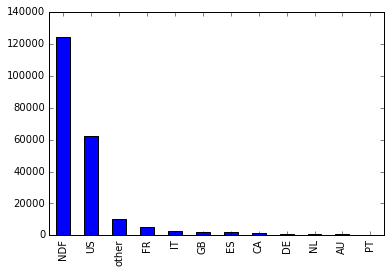

In [468]:
train.country_destination.value_counts().plot(kind='bar')

In [469]:
train.groupby('country_destination').size().apply(lambda x: float(x) / train.groupby('country_destination').size().sum()*100)

country_destination
AU        0.252517
CA        0.669006
DE        0.497070
ES        1.053638
FR        2.353233
GB        1.088774
IT        1.328174
NDF      58.347349
NL        0.356991
PT        0.101663
US       29.222632
other     4.728954
dtype: float64

In [470]:
##ADD the year as a seperate column 
train['dest_year'] = train.date_first_booking.map(lambda x : pd.to_datetime(x).year)

In [471]:
train_pivot_by_year_dest = pd.pivot_table(train,index=['dest_year','country_destination'],values=['id'],aggfunc=len)
train_pivot_by_year_dest

id
dest_year country_destination       
2010.0    AU                       7
          CA                      36
          DE                      15
          ES                      39
          FR                     117
          GB                      25
          IT                      24
          NL                       9
          PT                       1
          US                    1142
          other                   64
2011.0    AU                      32
          CA                     116
          DE                      89
          ES                     174
          FR                     420
          GB                     147
          IT                     177
          NL                      60
          PT                      17
          US                    4023
          other                  483
2012.0    AU                      95
          CA                     269
          DE                     264
          ES                     441
          FR                    1026
          GB                     483
          IT                     546
          NL                     142
...                              ...
2013.0    ES                     771
          FR                    1784
          GB                     828
          IT                     961
          NL                     269
          PT                      74
          US                   22011
          other                 3481
2014.0    AU                     179
          CA                     509
          DE                     298
          ES                     806
          FR                    1607
          GB                     802
          IT                    1090
          NL                     269
          PT                      87
          US                   22632
          other                 4140
2015.0    AU                      10
          CA                      22
          DE                       7
          ES                      18
          FR                      69
          GB                      39
          IT                      37
          NL                      13
          PT                       5
          US                    1349
          other                  203

[66 rows x 1 columns]

In [472]:
train_pivot_by_year_dest_pct=train_pivot_by_year_dest.groupby(level=0).transform(lambda x : (x/x.sum())*100)
train_pivot_by_year_dest_pct

id
dest_year country_destination           
2010.0    AU                    0.473293
          CA                    2.434077
          DE                    1.014199
          ES                    2.636917
          FR                    7.910751
          GB                    1.690331
          IT                    1.622718
          NL                    0.608519
          PT                    0.067613
          US                   77.214334
          other                 4.327248
2011.0    AU                    0.557686
          CA                    2.021610
          DE                    1.551063
          ES                    3.032415
          FR                    7.319624
          GB                    2.561868
          IT                    3.084699
          NL                    1.045661
          PT                    0.296270
          US                   70.111537
          other                 8.417567
2012.0    AU                    0.584939
          CA                    1.656302
          DE                    1.625516
          ES                    2.715350
          FR                    6.317345
          GB                    2.973955
          IT                    3.361862
          NL                    0.874330
...                                  ...
2013.0    ES                    2.466490
          FR                    5.707156
          GB                    2.648837
          IT                    3.074315
          NL                    0.860552
          PT                    0.236732
          US                   70.414921
          other                11.135993
2014.0    AU                    0.552145
          CA                    1.570067
          DE                    0.919214
          ES                    2.486196
          FR                    4.956970
          GB                    2.473858
          IT                    3.362226
          NL                    0.829760
          PT                    0.268361
          US                   69.810913
          other                12.770289
2015.0    AU                    0.564334
          CA                    1.241535
          DE                    0.395034
          ES                    1.015801
          FR                    3.893905
          GB                    2.200903
          IT                    2.088036
          NL                    0.733634
          PT                    0.282167
          US                   76.128668
          other                11.455982

[66 rows x 1 columns]

In [473]:
train_pivot=pd.concat([train_pivot_by_year_dest,train_pivot_by_year_dest_pct],axis=1)

In [474]:
train_pivot_by_year_dest_pct.unstack().iplot(kind='bar')

In [475]:
train['acc_created_year'] = train.date_account_created.map(lambda x : pd.to_datetime(x).year)

In [476]:
train_pivot_by_accyear_dest = pd.pivot_table(train,index=['acc_created_year','country_destination'],values=['id'],aggfunc=len)
train_pivot_by_accyear_dest_pct=train_pivot_by_accyear_dest.groupby(level=0).transform(lambda x : (x/x.sum())*100)
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
train_pivot_by_accyear_dest_pct.unstack().iplot(kind='bar')


In [477]:
layout = go.Layout(
    yaxis=dict(title='Number of Users'),
    title='Accounts Created Over time',
    showlegend = True)
train.set_index('date_account_created').groupby(pd.TimeGrouper('1M'))['id'].apply(lambda x: x.count()).iplot(layout =layout)

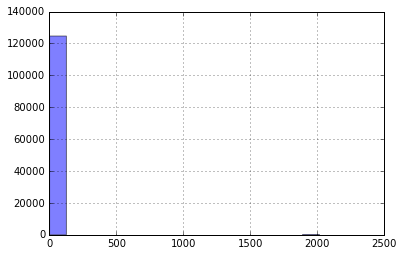

In [478]:
train.age.dropna().hist(bins=16,alpha=0.5)

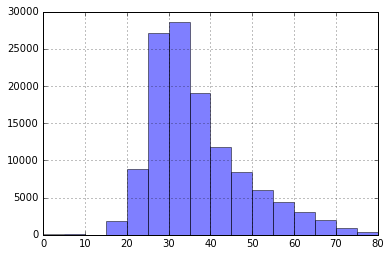

In [479]:
train.age.dropna().hist(bins=16,alpha=0.5,range=(0,80))

In [480]:
labels = ['1-5 years', '6-10 years', '11-15 years','16-20 years','21-25 years','26-30 years','31-35 years','36-40 years','41-45 years', '46-50 years','51-55 years','56-60 years','61-65 years','66-70 years','71-75 years','76-80 years','81-85 years','86-90 years','91-95 years','96-100 years','100-1000 years','1000+ years']
age_range = list(range(0, 105, 5))
age_range.append(1000)
age_range.append(10000)
#Binning using cut function of pandas
train['age_grp']=pd.cut(train.age,age_range,labels=labels,include_lowest=True)

In [481]:
pd.pivot_table(train,index=['age_grp','acc_created_year'],values=['id'],aggfunc=len).unstack().iplot(kind='bar',barmode='stack')

In [482]:
train_grp_acc_year = train.groupby('acc_created_year')
miss_list=[]
for name, group in train_grp_acc_year:
    missing_age_dict = {}
    missing_age_dict['Year'] = name
    missing_age_dict['Missing Values'] = group['age'].isnull().sum()
    missing_age_dict['Total Records'] =  len(group)
    missing_age_dict['% Missing'] =  str((group['age'].isnull().sum()/len(group))*100)+'%'
    miss_list.append(missing_age_dict)


In [483]:
pd.DataFrame(miss_list)

,% Missing,Missing Values,Total Records,Year
0,38.8091822095%,1082,2788,2010
1,34.7346072187%,4090,11775,2011
2,34.8183062186%,13740,39462,2012
3,42.1287367406%,34950,82960,2013
4,44.631600973%,34128,76466,2014


In [484]:
train_pivot_by_dvc_type=pd.pivot_table(train,index=['first_device_type','acc_created_year'],values=['id'],aggfunc=len,fill_value=0).unstack()

In [485]:
train_pivot_by_dvc_type

id                                   
acc_created_year      2010    2011     2012     2013     2014
first_device_type                                            
Android Phone         31.0   137.0    281.0    344.0   2010.0
Android Tablet        12.0    42.0    116.0    410.0    712.0
Desktop (Other)       11.0    42.0    160.0    488.0    498.0
Mac Desktop         1038.0  4758.0  18628.0  36685.0  28491.0
Other/Unknown        804.0  2505.0   1491.0   2338.0   3529.0
SmartPhone (Other)     NaN     6.0     29.0     11.0     30.0
Windows Desktop      603.0  2971.0  14861.0  30599.0  23682.0
iPad                 127.0   570.0   2401.0   5895.0   5346.0
iPhone               162.0   744.0   1495.0   6190.0  12168.0

In [486]:
##Fixing time stamps
def fix_timestamps(df):
    df['date_account_created'] = pd.to_datetime(df['date_account_created'],format='%Y-%m-%d')
    df['timestamp_first_active'] =  pd.to_datetime(df['timestamp_first_active'],format='%Y%m%d%H%M%S')
    df['date_account_created'].fillna(df.timestamp_first_active,inplace=True)
    return df

In [487]:
##Remove outliers
def remove_outliers(df,column,min_val,max_val):
    col_values=df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val,col_values>=max_val),np.NaN,col_values)
    return df


In [488]:
def convert_to_binary(df,column_to_convert):
    categories =  list(df[column_to_convert].drop_duplicates())
    for category in categories:
        cat_name = str(category).replace(" ","_").replace("(","").replace(")","").replace("/","_").replace("-","").lower()
        col_name =  column_to_convert[:5]+'_'+cat_name[:10]
        df[col_name]=0
        df.loc[(df[column_to_convert] == category),col_name] =1
    return df


In [489]:
def data_cleanup(df):
    df = fix_timestamps(df)
    df = remove_outliers(df,column='age',min_val=15,max_val=90)
    df['age'].fillna(-1,inplace=True)
    df.first_affiliate_tracked.fillna(-1,inplace=True)
    print("One Hot Encoding categorical data...")
    columns_to_encode=['gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser']
    for column in columns_to_encode:
        df = convert_to_binary(df=df,column_to_convert=column)
        df.drop(column,axis=1,inplace=True)
    return df
    

In [490]:
train_df = data_cleanup(train)

One Hot Encoding categorical data...


In [491]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,age,country_destination,dest_year,acc_created_year,age_grp,gende_unknown,...,first_avant_brow,first_opera_mobi,first_yandex.bro,first_theworld_b,first_slimbrowse,first_epic,first_stainless,first_googlebot,first_outlook_20,first_icedragon
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-1.0,NDF,NaN,2010,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,38.0,NDF,NaN,2011,36-40 years,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,56.0,US,2010.0,2010,56-60 years,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,42.0,other,2012.0,2011,41-45 years,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,41.0,US,2010.0,2010,41-45 years,1,...,0,0,0,0,0,0,0,0,0,0
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-1.0,US,2010.0,2010,NaN,1,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,46.0,US,2010.0,2010,46-50 years,0,...,0,0,0,0,0,0,0,0,0,0
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,47.0,US,2010.0,2010,46-50 years,0,...,0,0,0,0,0,0,0,0,0,0
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,50.0,US,2010.0,2010,46-50 years,0,...,0,0,0,0,0,0,0,0,0,0
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,46.0,US,2010.0,2010,46-50 years,1,...,0,0,0,0,0,0,0,0,0,0


In [492]:
def add_features(df):
    df['day_account_created'] =  df['date_account_created'].dt.weekday
    df['month_account_created'] = df['date_account_created'].dt.month
    df['quarter_account_created'] =  df['date_account_created'].dt.quarter
    df['year_account_created'] =  df['date_account_created'].dt.year
    df['hour_first_active'] =  df['timestamp_first_active'].dt.hour
    df['day_first_active'] =  df['timestamp_first_active'].dt.weekday
    df['month_first_active'] =  df['timestamp_first_active'].dt.month
    df['quarter_first_active'] =  df['timestamp_first_active'].dt.quarter
    df['year_first_active'] =  df['timestamp_first_active'].dt.year
    df['created_first_active'] =  (df['date_account_created'] - df['timestamp_first_active'])
    cols_to_drop=['date_account_created','timestamp_first_active','date_first_booking']
    for col in cols_to_drop:
        if col in df.columns:
            df.drop(col,axis=1,inplace=True)
    return df

In [493]:
train_df =  add_features(train_df)

In [494]:
train_df.columns.tolist()

['id',
 'age',
 'country_destination',
 'dest_year',
 'acc_created_year',
 'age_grp',
 'gende_unknown',
 'gende_male',
 'gende_female',
 'gende_other',
 'signu_facebook',
 'signu_basic',
 'signu_google',
 'signu_0',
 'signu_3',
 'signu_2',
 'signu_1',
 'signu_24',
 'signu_8',
 'signu_6',
 'signu_5',
 'signu_10',
 'signu_25',
 'signu_12',
 'signu_4',
 'signu_16',
 'signu_15',
 'signu_20',
 'signu_21',
 'signu_23',
 'langu_en',
 'langu_fr',
 'langu_de',
 'langu_es',
 'langu_it',
 'langu_pt',
 'langu_zh',
 'langu_ko',
 'langu_ja',
 'langu_ru',
 'langu_pl',
 'langu_el',
 'langu_sv',
 'langu_nl',
 'langu_hu',
 'langu_da',
 'langu_id',
 'langu_fi',
 'langu_no',
 'langu_tr',
 'langu_th',
 'langu_cs',
 'langu_hr',
 'langu_ca',
 'langu_is',
 'affil_direct',
 'affil_seo',
 'affil_other',
 'affil_semnonbran',
 'affil_content',
 'affil_sembrand',
 'affil_remarketin',
 'affil_api',
 'affil_google',
 'affil_craigslist',
 'affil_facebook',
 'affil_vast',
 'affil_bing',
 'affil_meetup',
 'affil_facebo

In [495]:
sess =  pd.read_csv('data/sessions.csv')

In [496]:
sess.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [497]:
print("Determine primary device")
aggg_lvl1=sess.loc[:,['user_id','device_type','secs_elapsed']].groupby(['user_id','device_type'],as_index=False,sort=False).aggregate(np.sum)

Determine primary device


In [498]:
aggg_lvl1

,user_id,device_type,secs_elapsed
0,d1mm9tcy42,Windows Desktop,3315820.0
1,d1mm9tcy42,-unknown-,111709.0
2,yo8nz8bqcq,Mac Desktop,207842.0
3,4grx6yxeby,Windows Desktop,1059362.0
4,4grx6yxeby,-unknown-,76082.0
5,ncf87guaf0,Windows Desktop,3361226.0
6,ncf87guaf0,-unknown-,119872.0
7,ncf87guaf0,Android Phone,274002.0
8,4rvqpxoh3h,iPhone,2555.0
9,c8mfesvkv0,iPad Tablet,1380288.0


In [499]:
idx = aggg_lvl1.groupby(['user_id'],sort=False)['secs_elapsed'].transform(max)== aggg_lvl1['secs_elapsed']
df_primary = pd.DataFrame(aggg_lvl1.loc[idx,['user_id','device_type','secs_elapsed']])
df_primary

,user_id,device_type,secs_elapsed
0,d1mm9tcy42,Windows Desktop,3315820.0
2,yo8nz8bqcq,Mac Desktop,207842.0
3,4grx6yxeby,Windows Desktop,1059362.0
5,ncf87guaf0,Windows Desktop,3361226.0
8,4rvqpxoh3h,iPhone,2555.0
9,c8mfesvkv0,iPad Tablet,1380288.0
10,xwxei6hdk4,iPhone,48863.0
12,5f45ro5uzk,Windows Desktop,605413.0
13,ro2stddszp,Mac Desktop,1284401.0
14,qtw88d9pbl,Mac Desktop,2868205.0


In [500]:
df_primary.rename(columns={'device_type':'primary_device','secs_elapsed':'primary_secs'},inplace=True)
df_primary =  convert_to_binary(df=df_primary,column_to_convert='primary_device')
df_primary.drop('primary_device',axis=1,inplace=True)

In [501]:
#Secondary device
remaining =  aggg_lvl1.drop(aggg_lvl1.index[idx])
idx = remaining.groupby(['user_id'],sort=False)['secs_elapsed'].transform(max) == remaining['secs_elapsed']
df_secondary = pd.DataFrame(remaining.loc[idx,['user_id','device_type','secs_elapsed']])
df_secondary.rename(columns = {'device_type':'sec_device','secs_elapsed':'sec_secs'},inplace=True)
df_secondary =  convert_to_binary(df=df_secondary,column_to_convert='sec_device')
df_secondary.drop('sec_device',axis=1,inplace=True)

In [502]:
def count_actions(df,id_col,column_to_convert):
    id_list = df[id_col].drop_duplicates()
    df_counts = df.loc[:,[id_col,column_to_convert]]
    df_counts['count']=1
    df_counts =  df_counts.groupby(by=[id_col,column_to_convert],as_index=False,sort=False).sum()
    new_df = df_counts.pivot(index = id_col,columns = column_to_convert,values= 'count')
    new_df=new_df.fillna(0)
    categories =  list(df[column_to_convert].drop_duplicates())
    for category in categories:
        cat_name = str(category).replace(" ","_").replace("(","").replace(")","").replace("/","_").replace("-","").lower()
        col_name=column_to_convert+'_'+cat_name
        new_df.rename(columns={category:col_name},inplace=True)
    return new_df
    
sess_actions = sess.loc[:,["user_id","action","action_type","action_detail"]]
cols_to_convert=['action','action_type','action_detail']
sess_actions =  sess_actions.fillna('not provided')
first = True
for col in cols_to_convert:
    print ("Converting "+col+" column....")
    current_data = count_actions(df=sess_actions,id_col='user_id',column_to_convert= col)
    if first:
        first=False
        actions_data = current_data
    else :
        actions_data = pd.concat([actions_data,current_data],axis=1,join='inner')

Converting action column....
Converting action_type column....
Converting action_detail column....


In [503]:
df_primary.set_index('user_id',inplace=True)
df_secondary.set_index('user_id',inplace=True)
device_data = pd.concat([df_primary,df_secondary],axis=1,join='outer')

combined_results= pd.concat([device_data,actions_data],axis=1,join='outer')
df_sessions = combined_results.fillna(0)

train_df.set_index('id',inplace=True)
train_all =  pd.concat([train_df,df_sessions],axis=1,join='inner')

In [504]:
labels =  train_all.country_destination

In [505]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(labels)
X = train_all.drop('country_destination',axis=1,inplace=False)

In [506]:
X.drop(['dest_year','acc_created_year','age_grp','created_first_active'],axis=1,inplace=True)

In [509]:
id_train = X.index.values

In [510]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [511]:
xgb_model  = xgb.XGBClassifier(objective='multi:softprob',subsample = 0.5,colsample_bytree=0.5,seed=0)
param_grid=  {'max_depth':[3,4,5],'learning_rate':[0.1,0.3],'n_estimators':[25,50]}
model = GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='accuracy',verbose=10,n_jobs=1,iid=True,refit=True,cv=3)
model.fit(X,Y)
print ("Best score : %0.3f"%model.best_score_)
print ("Best parameters set:")
best_params =  model.best_estimator_.get_params()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:   30.6s


[CV]  learning_rate=0.1, max_depth=3, n_estimators=25, score=0.695868 -  30.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=3, n_estimators=25, score=0.696606 -  35.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=3, n_estimators=25, score=0.693118 -  33.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:  2.7min


[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.699850 - 1.0min
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.700914 - 1.0min
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.701980 - 1.0min
[CV] learning_rate=0.1, max_depth=4, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:  5.4min


[CV]  learning_rate=0.1, max_depth=4, n_estimators=25, score=0.699403 -  40.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=4, n_estimators=25, score=0.698638 -  40.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=4, n_estimators=25, score=0.697833 -  40.7s
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=4, n_estimators=50, score=0.702084 - 1.3min
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=4, n_estimators=50, score=0.703475 - 1.3min
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed: 10.6min


[CV]  learning_rate=0.1, max_depth=4, n_estimators=50, score=0.704500 - 1.3min
[CV] learning_rate=0.1, max_depth=5, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=5, n_estimators=25, score=0.701881 -  48.7s
[CV] learning_rate=0.1, max_depth=5, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=5, n_estimators=25, score=0.700874 -  48.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=5, n_estimators=25, score=0.699093 -  48.5s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.704563 - 1.6min
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed: 16.2min


[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.704613 - 1.6min
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.705476 - 1.6min
[CV] learning_rate=0.3, max_depth=3, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=3, n_estimators=25, score=0.700784 -  31.4s
[CV] learning_rate=0.3, max_depth=3, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=3, n_estimators=25, score=0.700061 -  31.4s
[CV] learning_rate=0.3, max_depth=3, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=3, n_estimators=25, score=0.703565 -  31.6s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.702694 -  59.8s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.701727 -  59.9s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed: 22.4min


[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.705760 -  59.8s
[CV] learning_rate=0.3, max_depth=4, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=4, n_estimators=25, score=0.702613 -  39.8s
[CV] learning_rate=0.3, max_depth=4, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=4, n_estimators=25, score=0.702052 -  39.9s
[CV] learning_rate=0.3, max_depth=4, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=4, n_estimators=25, score=0.702874 -  40.6s
[CV] learning_rate=0.3, max_depth=4, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=4, n_estimators=50, score=0.702775 - 1.3min
[CV] learning_rate=0.3, max_depth=4, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=4, n_estimators=50, score=0.702499 - 1.3min
[CV] learning_rate=0.3, max_depth=4, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=4, n_estimators=50, score=0.704866 - 1.3min
[CV] learning_rate=0.3, max_depth=5, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed: 29.0min


[CV]  learning_rate=0.3, max_depth=5, n_estimators=25, score=0.703100 -  48.1s
[CV] learning_rate=0.3, max_depth=5, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=5, n_estimators=25, score=0.704125 -  48.1s
[CV] learning_rate=0.3, max_depth=5, n_estimators=25 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=5, n_estimators=25, score=0.704378 -  48.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, score=0.702409 - 1.6min
[CV] learning_rate=0.3, max_depth=5, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, score=0.700874 - 1.6min
[CV] learning_rate=0.3, max_depth=5, n_estimators=50 .................


/Users/satishterala/anaconda2/envs/py35/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 40.3min finished


[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, score=0.705191 - 6.5min
Best score : 0.705
Best parameters set:


NameError: name 'best_parameters' is not defined

In [512]:
for param_name in sorted(param_grid.keys()):
    print("\t %s: %r"% (param_name,best_params[param_name]))

	 learning_rate: 0.1
	 max_depth: 5
	 n_estimators: 50
